In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 6)

import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
sample_rate = 48000
tau = 2.0 * np.pi

In [3]:
def exp_ramp(current, target, attack, linearity):
    flip = False
    if current > target:
        flip = True
        current, target = target, current
    out = current
    out_arr = [out]
    sample_count = 0
    for i in range(0, 500):
        out += attack * ((target/linearity) - out)
        if flip:
            out_arr.append(target - out + current)
        else:
            out_arr.append(out)
        if out > target:
            out = target
        else:
            sample_count += 1
    print("reach %s in %s samples" % (target, sample_count))
    return np.array(out_arr)

reach 1.0 in 165 samples


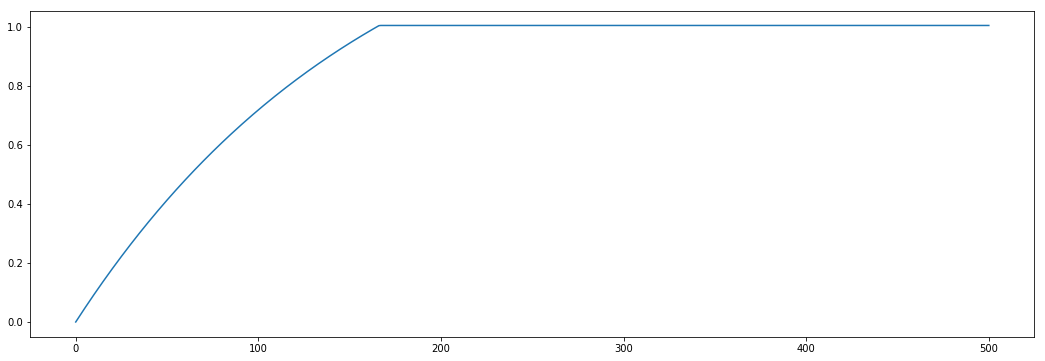

In [4]:
plot(exp_ramp(0.0, 1.0, 0.006, 0.63))

reach 1.0 in 330 samples


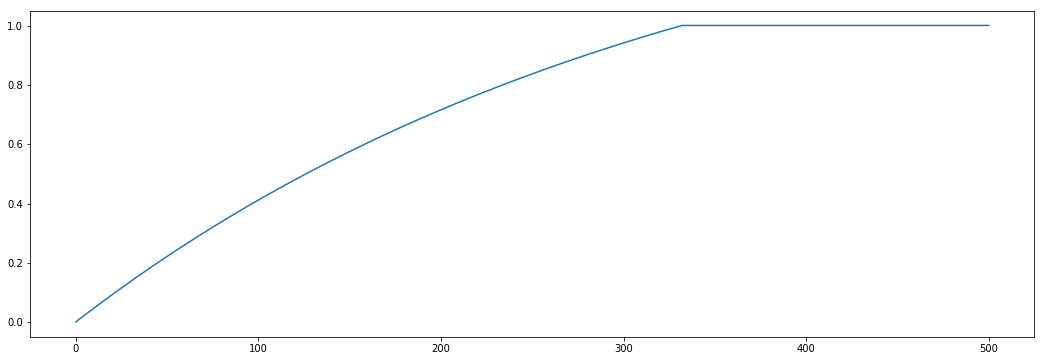

In [5]:
plot(exp_ramp(0.0, 1.0, 0.003, 0.63))

reach 1.0 in 400 samples


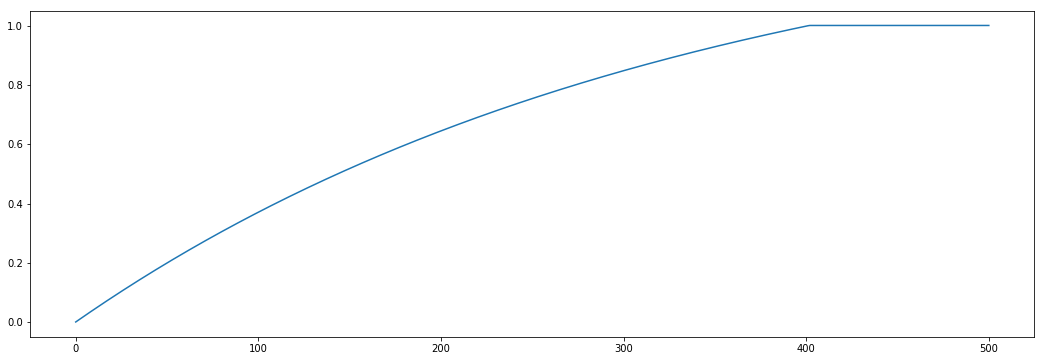

In [6]:
plot(exp_ramp(0.0, 1.0, 0.003, 0.7))

reach 1.0 in 193 samples


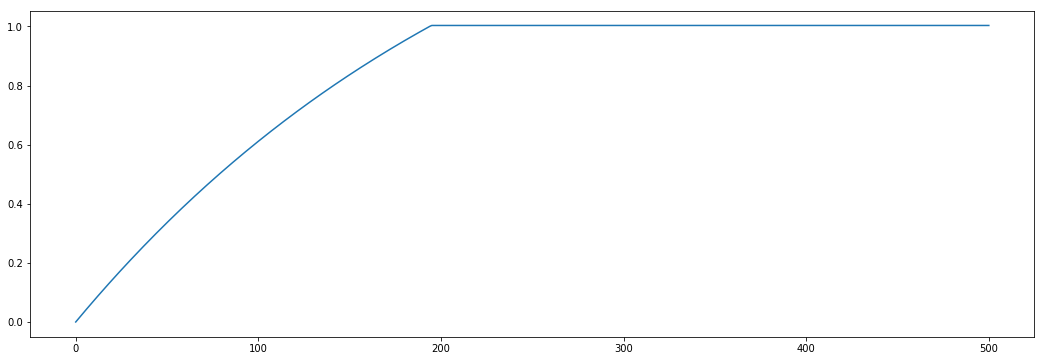

In [7]:
plot(exp_ramp(0.0, 1.0, 0.004, 0.54))

reach 1.0 in 236 samples


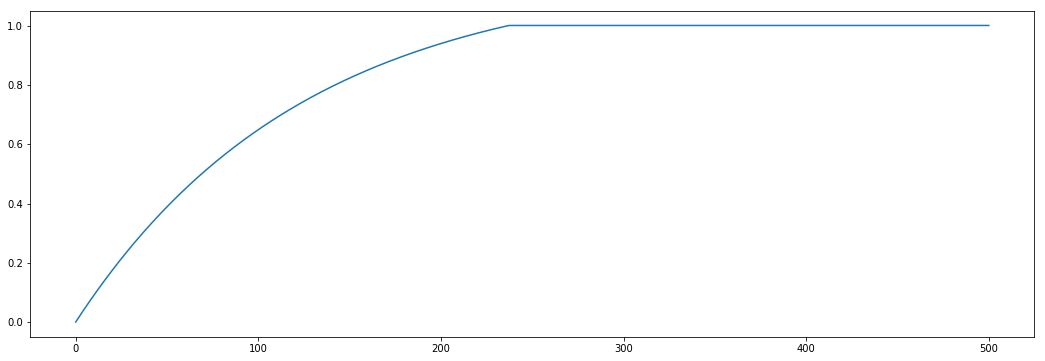

In [8]:
plot(exp_ramp(0.0, 1.0, 0.008, 0.85))

reach 1.0 in 236 samples


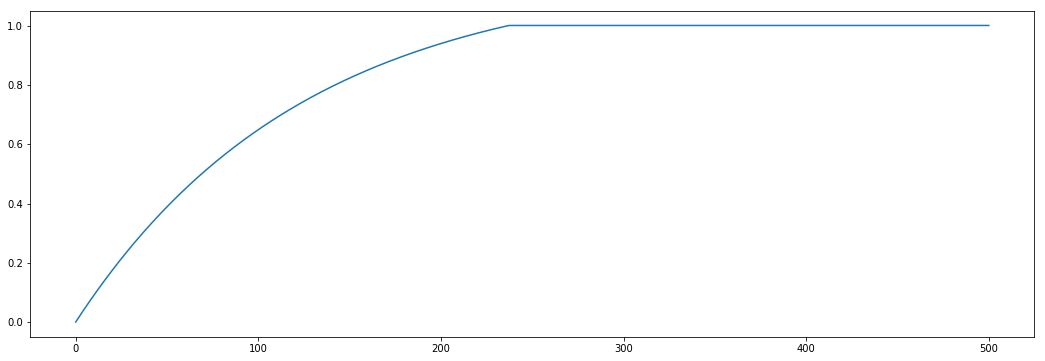

In [9]:
plot(exp_ramp(0.0, 1.0, 0.008, 0.85))

reach 1.0 in 167 samples


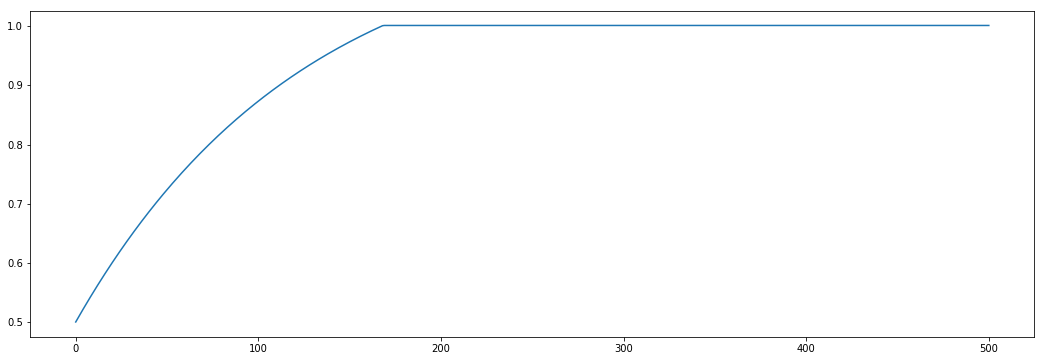

In [10]:
plot(exp_ramp(0.5, 1.0, 0.008, 0.85))

reach 0.5 in 138 samples


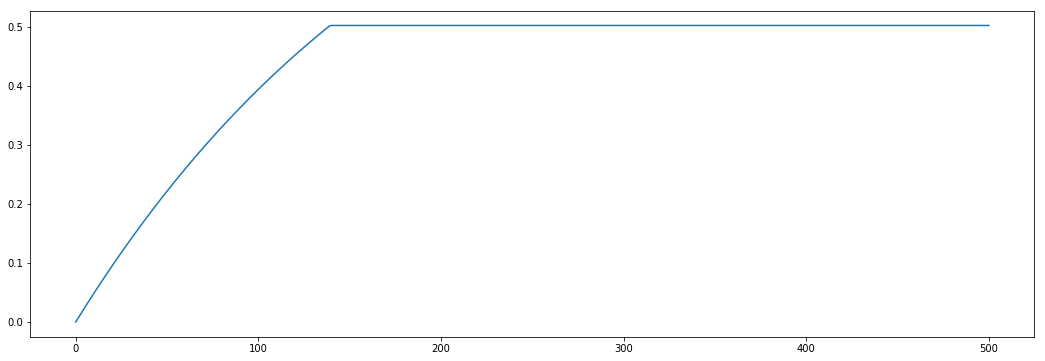

In [11]:
plot(exp_ramp(0.0, 0.5, 0.005, 0.5))

reach 1.0 in 206 samples


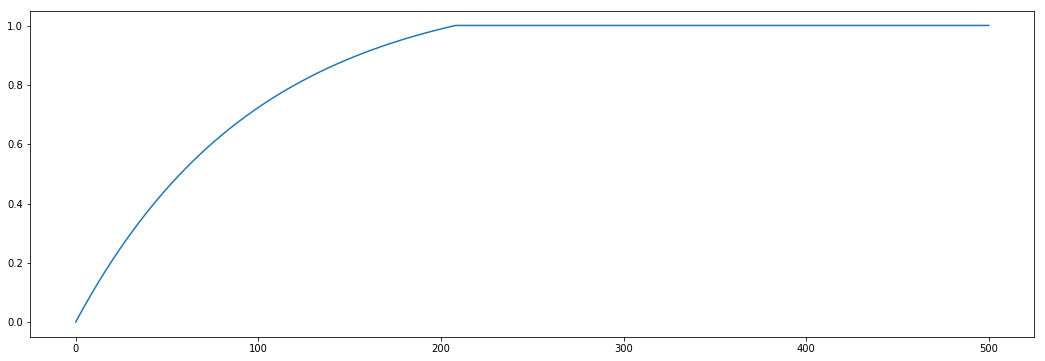

In [12]:
plot(exp_ramp(0.0, 1.0, 0.01, 0.875))

In [13]:
def exp_ramp2(start, end, attack, linearity):
    # always start at 0, so the curve of the ramp stays consistent
    offset = start
    out_mult = end - start
    
    out = 0.0
    out_arr = [out]
    sample_count = 0
    for i in range(0, 500):
        out += attack * ((1.0/linearity) - out)
        out_arr.append(offset + (out_mult * out))
        if out > 1.0:
            out = 1.0
        else:
            sample_count += 1
    print("reach %s in %s samples" % (1.0, sample_count))
    return np.array(out_arr)

reach 1.0 in 138 samples


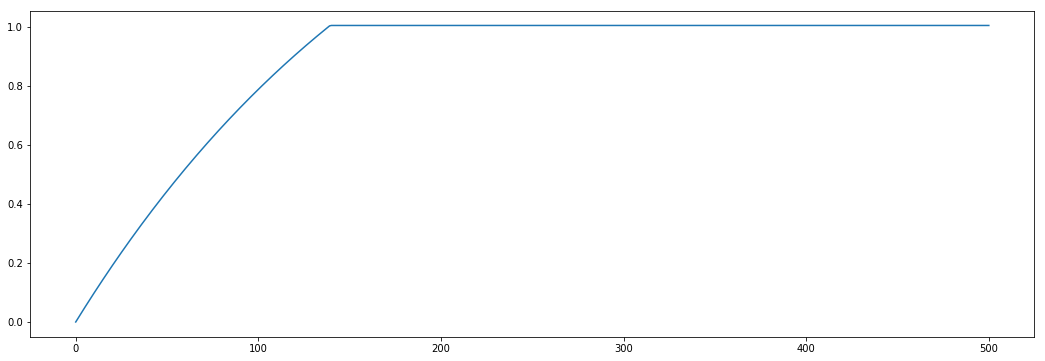

In [14]:
plot(exp_ramp2(0.0, 1.0, 0.005, 0.5))

reach 1.0 in 138 samples


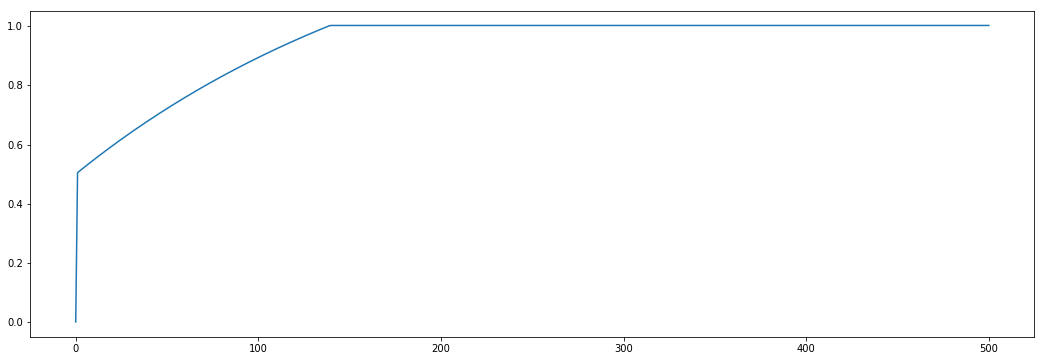

In [15]:
plot(exp_ramp2(0.5, 1.0, 0.005, 0.5))

reach 1.0 in 138 samples


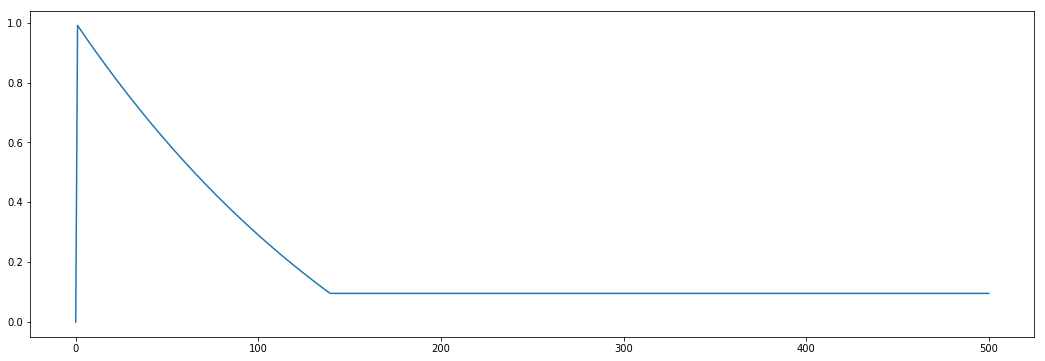

In [16]:
plot(exp_ramp2(1.0, 0.1, 0.005, 0.5))

reach 1.0 in 239 samples


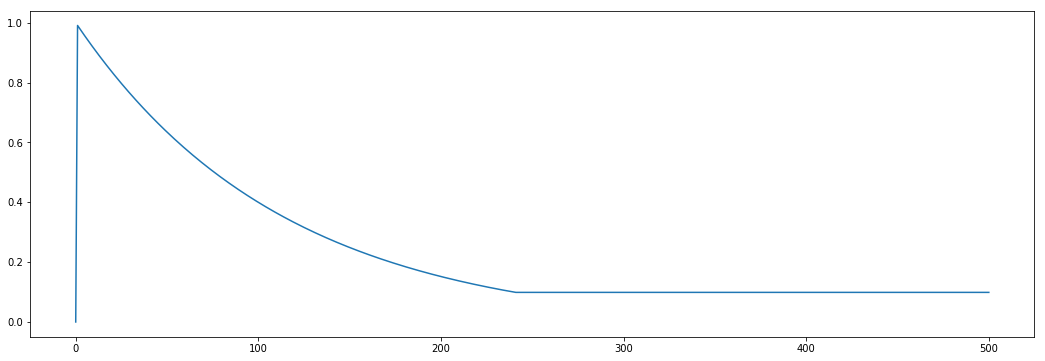

In [17]:
plot(exp_ramp2(1.0, 0.1, 0.0088, 0.88))

In [18]:
sample_rate = 44100
attack_ms = 100
attack_samples = sample_rate / 1000.0 * attack_ms
print("attack samples: %s" % attack_samples)

attack samples: 4410.0


In [19]:
def attack_coef_from_ms(linearity_coef, attack_ms, sample_rate):
    attack_samples = sample_rate / 1000.0 * attack_ms
    coef = np.e * linearity_coef * linearity_coef / attack_samples
    return coef
print(attack_coef_from_ms(0.88, 100, 44100))

0.000477332754639


In [26]:
def exp_ramp_ms(start, end, attack_ms, linearity, sample_rate):
    attack_samples = floor(sample_rate / 1000.0 * attack_ms)
    attack_coef = np.e * linearity * linearity / attack_samples
    print("attack coef: %s" % attack_coef)
    # always start at 0, so the curve of the ramp stays consistent
    offset = start
    out_mult = end - start
    
    out = 0.0
    out_arr = [out]
    sample_count = 0
    while 1:
        out += attack_coef * ((1.0/linearity) - out)
        out_arr.append(offset + (out_mult * out))
        if out > 1.0:
            out = 1.0
            break
        else:
            sample_count += 1
    print("reached target in %s samples" % sample_count)
    return np.array(out_arr)

attack coef: 0.000477332754639
reached target in 4440 samples


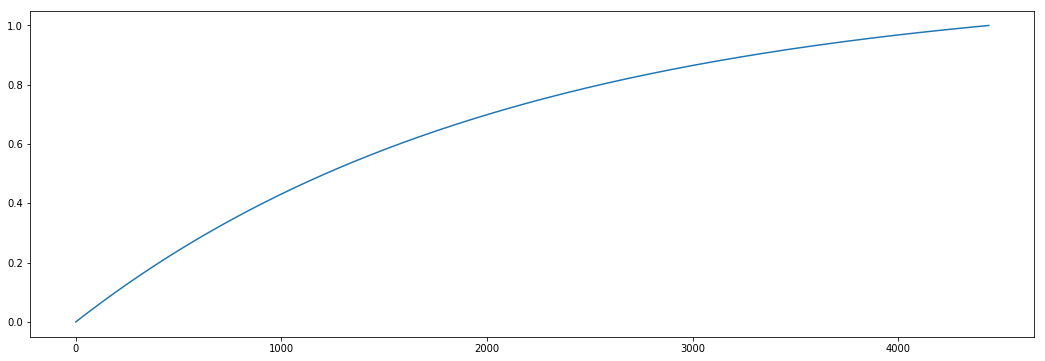

In [27]:
plot(exp_ramp_ms(0.0, 1.0, 100, 0.88, 44100))

attack coef: 0.00159110918213
reached target in 1331 samples


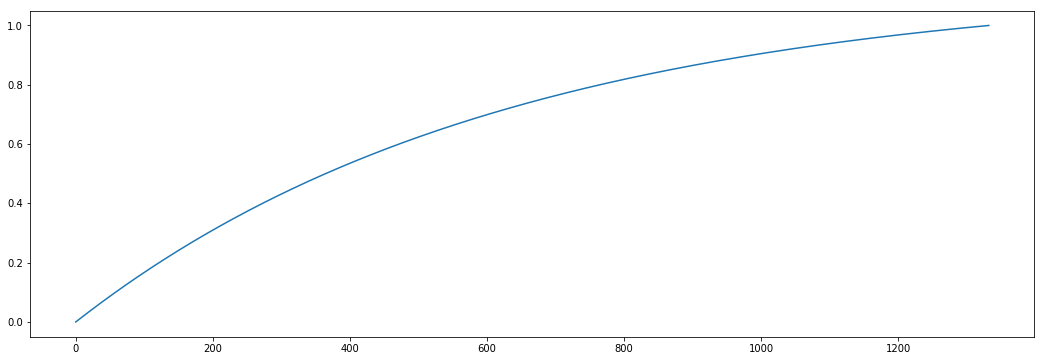

In [28]:
plot(exp_ramp_ms(0.0, 1.0, 30, 0.88, 44100))

attack coef: 0.00131496626622
reached target in 1223 samples


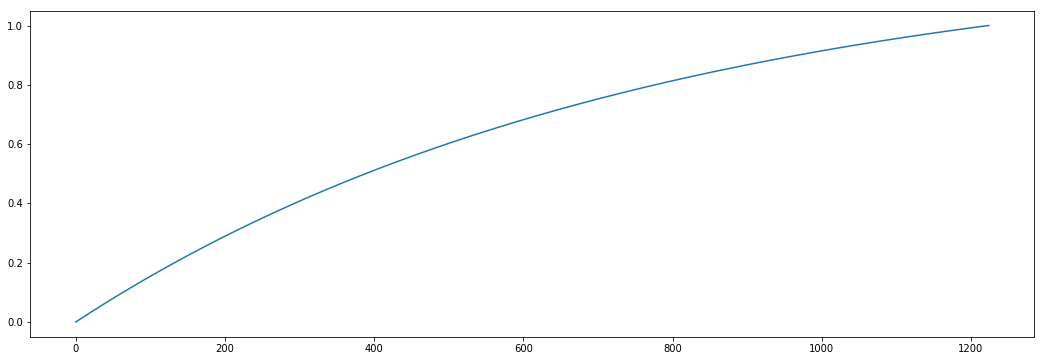

In [29]:
plot(exp_ramp_ms(0.0, 1.0, 30, 0.8, 44100))

attack coef: 0.00100677104758
reached target in 1195 samples


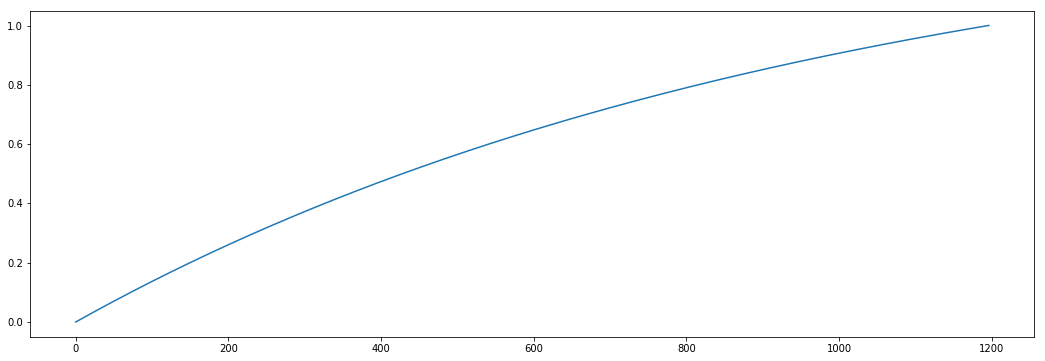

In [30]:
plot(exp_ramp_ms(0.0, 1.0, 30, 0.7, 44100))

In [35]:
def exp_ramp_ms_hard(start, end, attack_ms, linearity, sample_rate):
    attack_samples = int(floor(sample_rate / 1000.0 * attack_ms))
    attack_coef = np.e * linearity * linearity / attack_samples
    print("attack coef: %s" % attack_coef)
    # always start at 0, so the curve of the ramp stays consistent
    offset = start
    out_mult = end - start
    
    out = 0.0
    out_arr = [out]
    sample_count = 0
    for i in range(0, attack_samples):
        out += attack_coef * ((1.0/linearity) - out)
        out_arr.append(offset + (out_mult * out))
        if out > 1.0:
            out = 1.0
            break
        else:
            sample_count += 1
    print("reached %s in %s samples" % (out, sample_count))
    return np.array(out_arr)

attack coef: 0.00159110918213
reached 0.998139747745 in 1323 samples


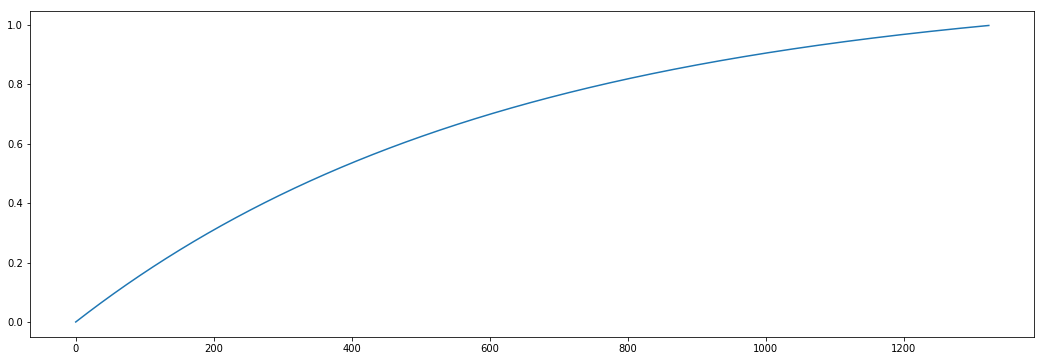

In [36]:
plot(exp_ramp_ms_hard(0.0, 1.0, 30, 0.88, 44100))

attack coef: 2.3866637732e-05
reached 0.929983771412 in 22050 samples


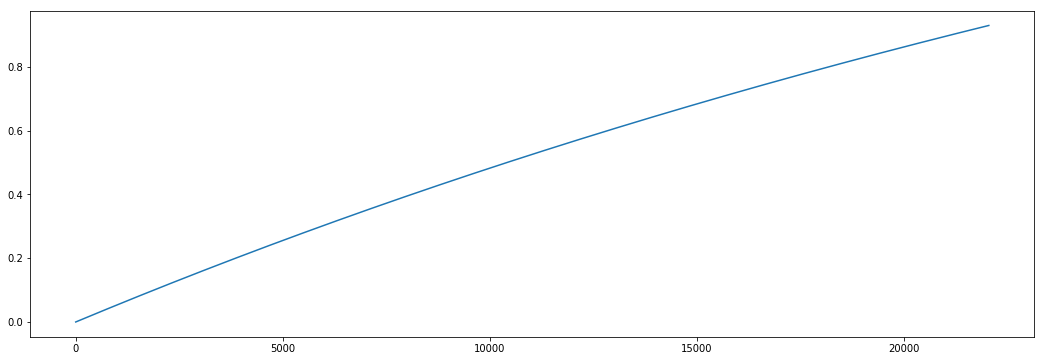

In [40]:
plot(exp_ramp_ms_hard(0.0, 1.0, 500, 0.44, 44100))

attack coef: 4.89290729123e-05
reached 1.0 in 20319 samples


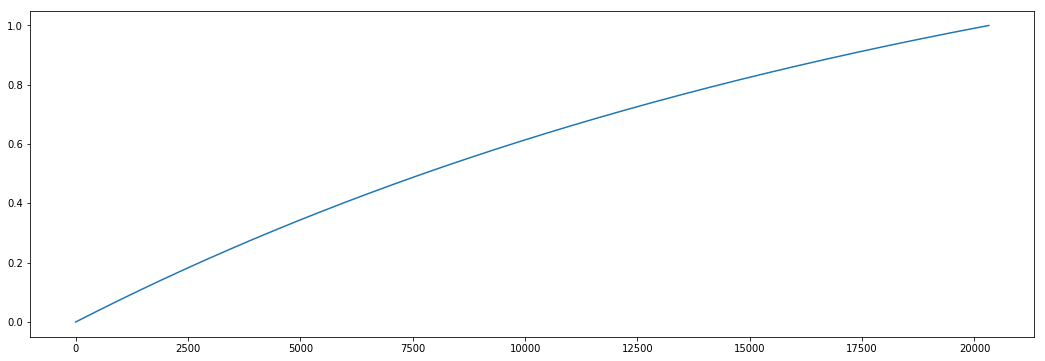

In [41]:
plot(exp_ramp_ms_hard(0.0, 1.0, 500, 0.63, 44100))